### Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/alexvalles/Documents/Data Science/Curso Data Science Presencial/Sprint 5/housing data.csv',
                names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                        'B', 'LSTAT', 'MEDV'])

In [407]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [408]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

CHAS y RAD serán consideradas variables categóricas. No deberían estar ni interferir en los análisis estadísticos. Realizaremos los cambios necesarios:

In [409]:
# Convertimos CHAS Y RAD a variables categóricas

df['CHAS'] = df['CHAS'].astype('category')
df['RAD'] = df['RAD'].astype('category')

In [410]:
df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

In [411]:
df['RAD'].unique() 

[1, 2, 3, 5, 4, 8, 6, 7, 24]
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 24]

In [412]:
df['CHAS'].unique() 

[0, 1]
Categories (2, int64): [0, 1]

In [413]:
df.isnull().sum() # comprobamos que no hay valores nulos o faltantes

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [414]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


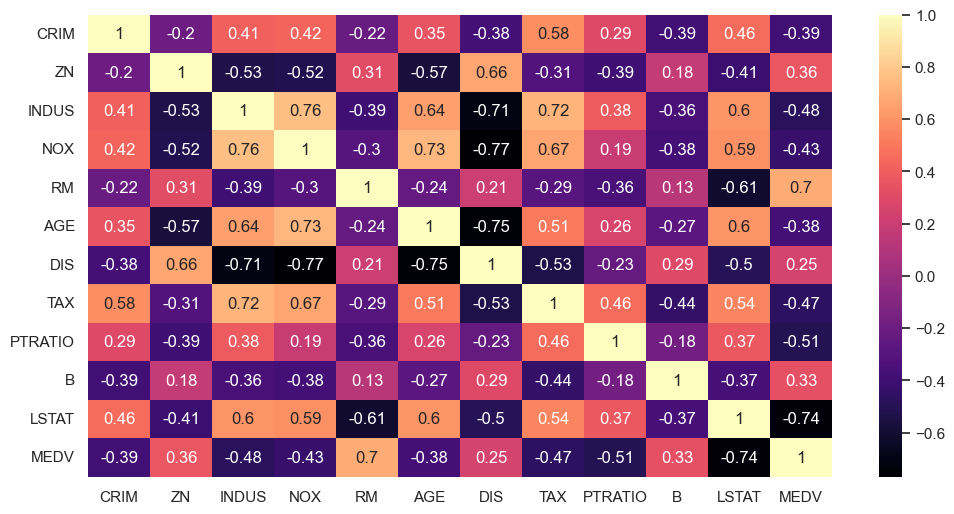

In [415]:
sns.heatmap(df.corr(),annot=True,cmap='magma')

sns.set(rc={"figure.figsize": (12, 6)})

Las columnas LSTAT, INDUS, RM, TAX, NOX, PTRATIO tienen un valor de correlación con MEDV por encima de 0.5, es un buen indicador para usarlos como predictores.

A continuación dividiremos el dataframe:

In [465]:
from sklearn.model_selection import train_test_split

# Antes de dividir el dataframe, hay que definir las variables 'X' e 'y'.
# Suponemos que la variable objetivo 'MEDV'(el objeto de esta tabla es 
# conocer los precios (MEDV) en función de las demás variables.)

X = df.drop('MEDV', axis=1)  # Sacamos MEDV porque es la variable que queremos predecir
y = df['MEDV']  # Variable objetivo (lo que intentamos predecir)

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 )
    
X_train.shape , X_test.shape

((354, 13), (152, 13))

Una vez dividido el dataframe, empezamos a entrenar el modelo:

In [417]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [418]:
predict = model.predict(X_test)
predict

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [464]:
# Ahora comparamos los precios previstos con los precios reales obtenidos.

comparacion_pred_act = pd.DataFrame({"Predicted":predict , "Actual": y_test})
comparacion_pred_act

,Predicted,Actual
329,24.935708,22.6
371,23.751632,50.0
219,29.326383,23.0
403,11.975346,8.3
78,21.372725,21.2
...,...,...
4,27.811077,36.2
428,14.506816,11.0
385,7.573699,7.2
308,28.334807,22.8


In [420]:
comparacion_pred_act.head(20) 

,Predicted,Actual
329,24.935708,22.6
371,23.751632,50.0
219,29.326383,23.0
403,11.975346,8.3
78,21.372725,21.2
15,19.191485,19.9
487,20.571748,20.6
340,21.211540,18.7
310,19.045720,16.1
102,20.354632,18.6


Comprobamos que en la mayoría de los casos, los datos previstos de precios son relativamente confiables, nos ofrecen valores aproximados a los datos reales. Por ejemplo:

78  21.372725 (prev)	         21.2 (real)

15  19.191485 (prev)	         19.9 (real)

487	20.571748 (prev)             20.6 (real)

En cambio, no siempre obtenemos resultados fiables. También tenemos un porcentaje de casos, en los que las previsiones difieren significamente de los datos reales, aquí estaríamos hablando de outliers.


371	23.751632 (prev)	         50.0 (real)
162	40.202707 (prev)	         50.0 (real)

En cualquier caso deberíamos realizar un accuracy score, para saber qué porcentaje de previsiones fueron correctas.


In [421]:
from sklearn.metrics import accuracy_score  # Hacemos accuracy score

model.score(X_test, y_test)

0.6733825506400185

el valor de 0.6733825506400185 significa que aproximadamente el 67.34% de las predicciones en el conjunto de prueba fueron correctas.

Adicionalmente, podríamos hacer un histograma de las variables de train y test, con el fin de comprobar si siguen el mismo patrón o no.

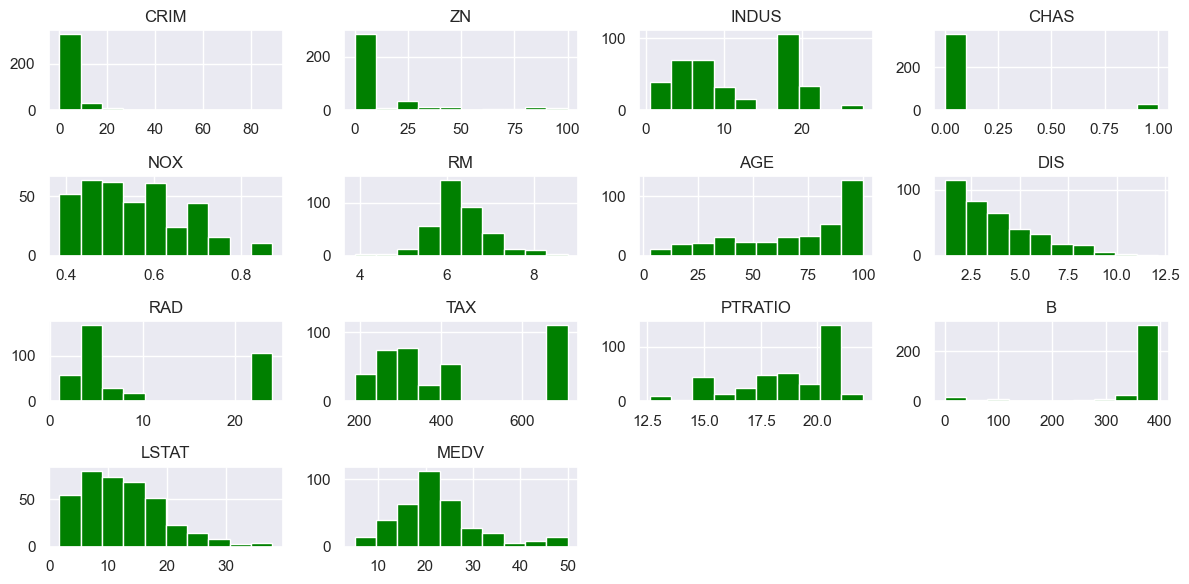

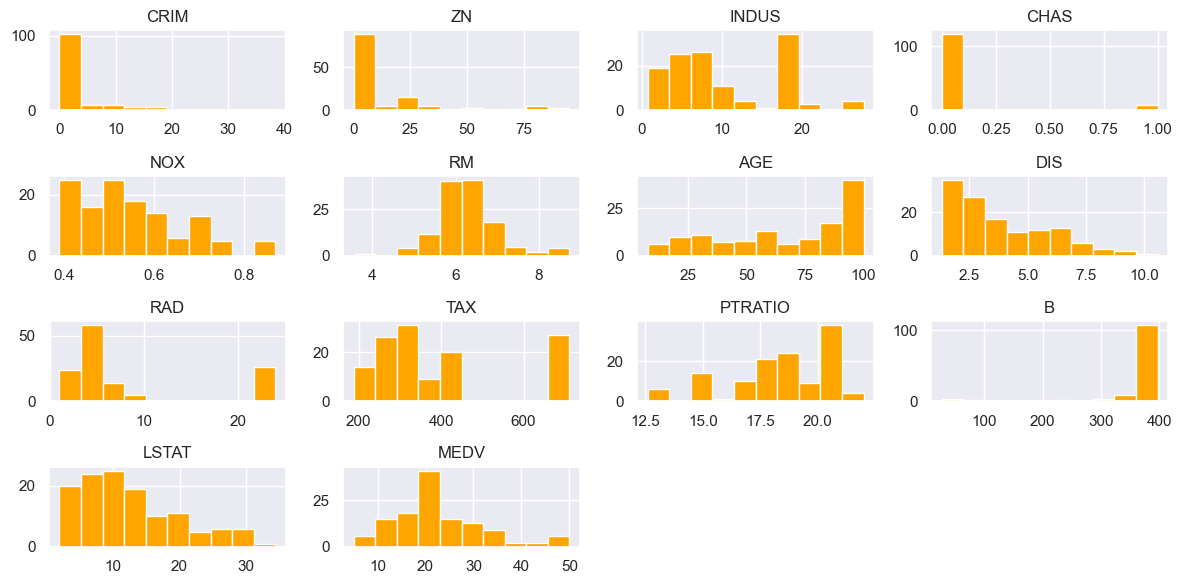

In [422]:
# Histograma Train
train.hist(color='green', label='Train')
plt.title('Histograma de Train')

plt.tight_layout()
plt.show()

# Histograma Test
test.hist(color='orange', label='Test')
plt.title('Histograma de Test')

plt.tight_layout()
plt.show()

Como esperábamos, los histogramas de train y test son bastantes similares, pero podemos ver ligeras diferencias, que vendrían a ser el 33% aprox de predicciones no correctas.

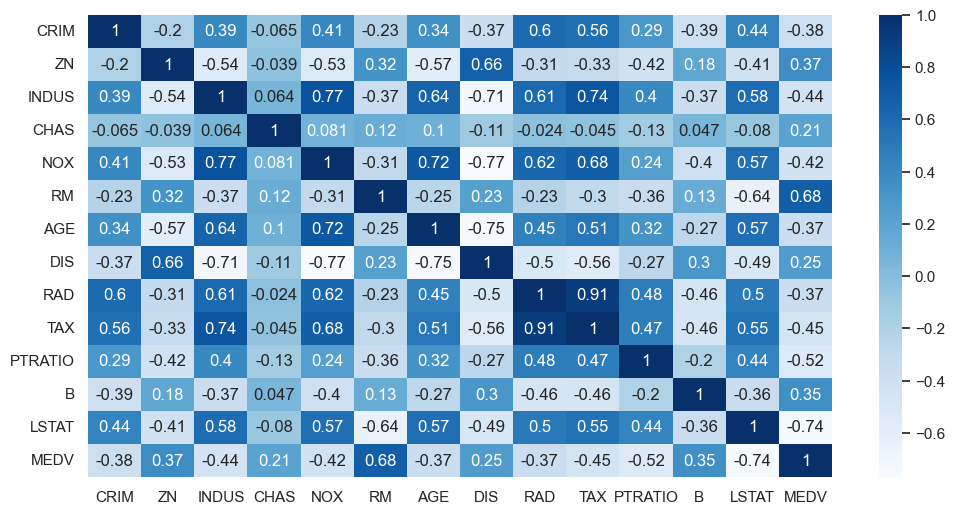

In [423]:
# Hacemos heatmap para ver las correlaciones de Train

sns.heatmap(train.corr(),annot=True,cmap='Blues')

sns.set(rc={"figure.figsize": (12, 6)})

In [424]:
train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.894606,10.990765,11.338654,0.071240,0.556106,6.287538,69.169657,3.772793,9.910290,415.279683,18.496834,352.698971,12.584881,22.462797
std,9.357635,23.029870,6.860239,0.257566,0.114849,0.687717,27.900329,2.116337,8.902017,171.342693,2.152147,96.801287,6.972794,9.099248
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082100,0.000000,5.190000,0.000000,0.449000,5.892000,45.700000,2.068550,4.000000,280.500000,17.400000,373.230000,6.910000,16.800000
50%,0.269380,0.000000,9.900000,0.000000,0.538000,6.209000,78.100000,3.182700,5.000000,337.000000,19.100000,391.000000,11.450000,21.200000
75%,4.130400,6.250000,18.100000,0.000000,0.627500,6.629500,93.850000,5.116700,24.000000,666.000000,20.200000,395.720000,16.695000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


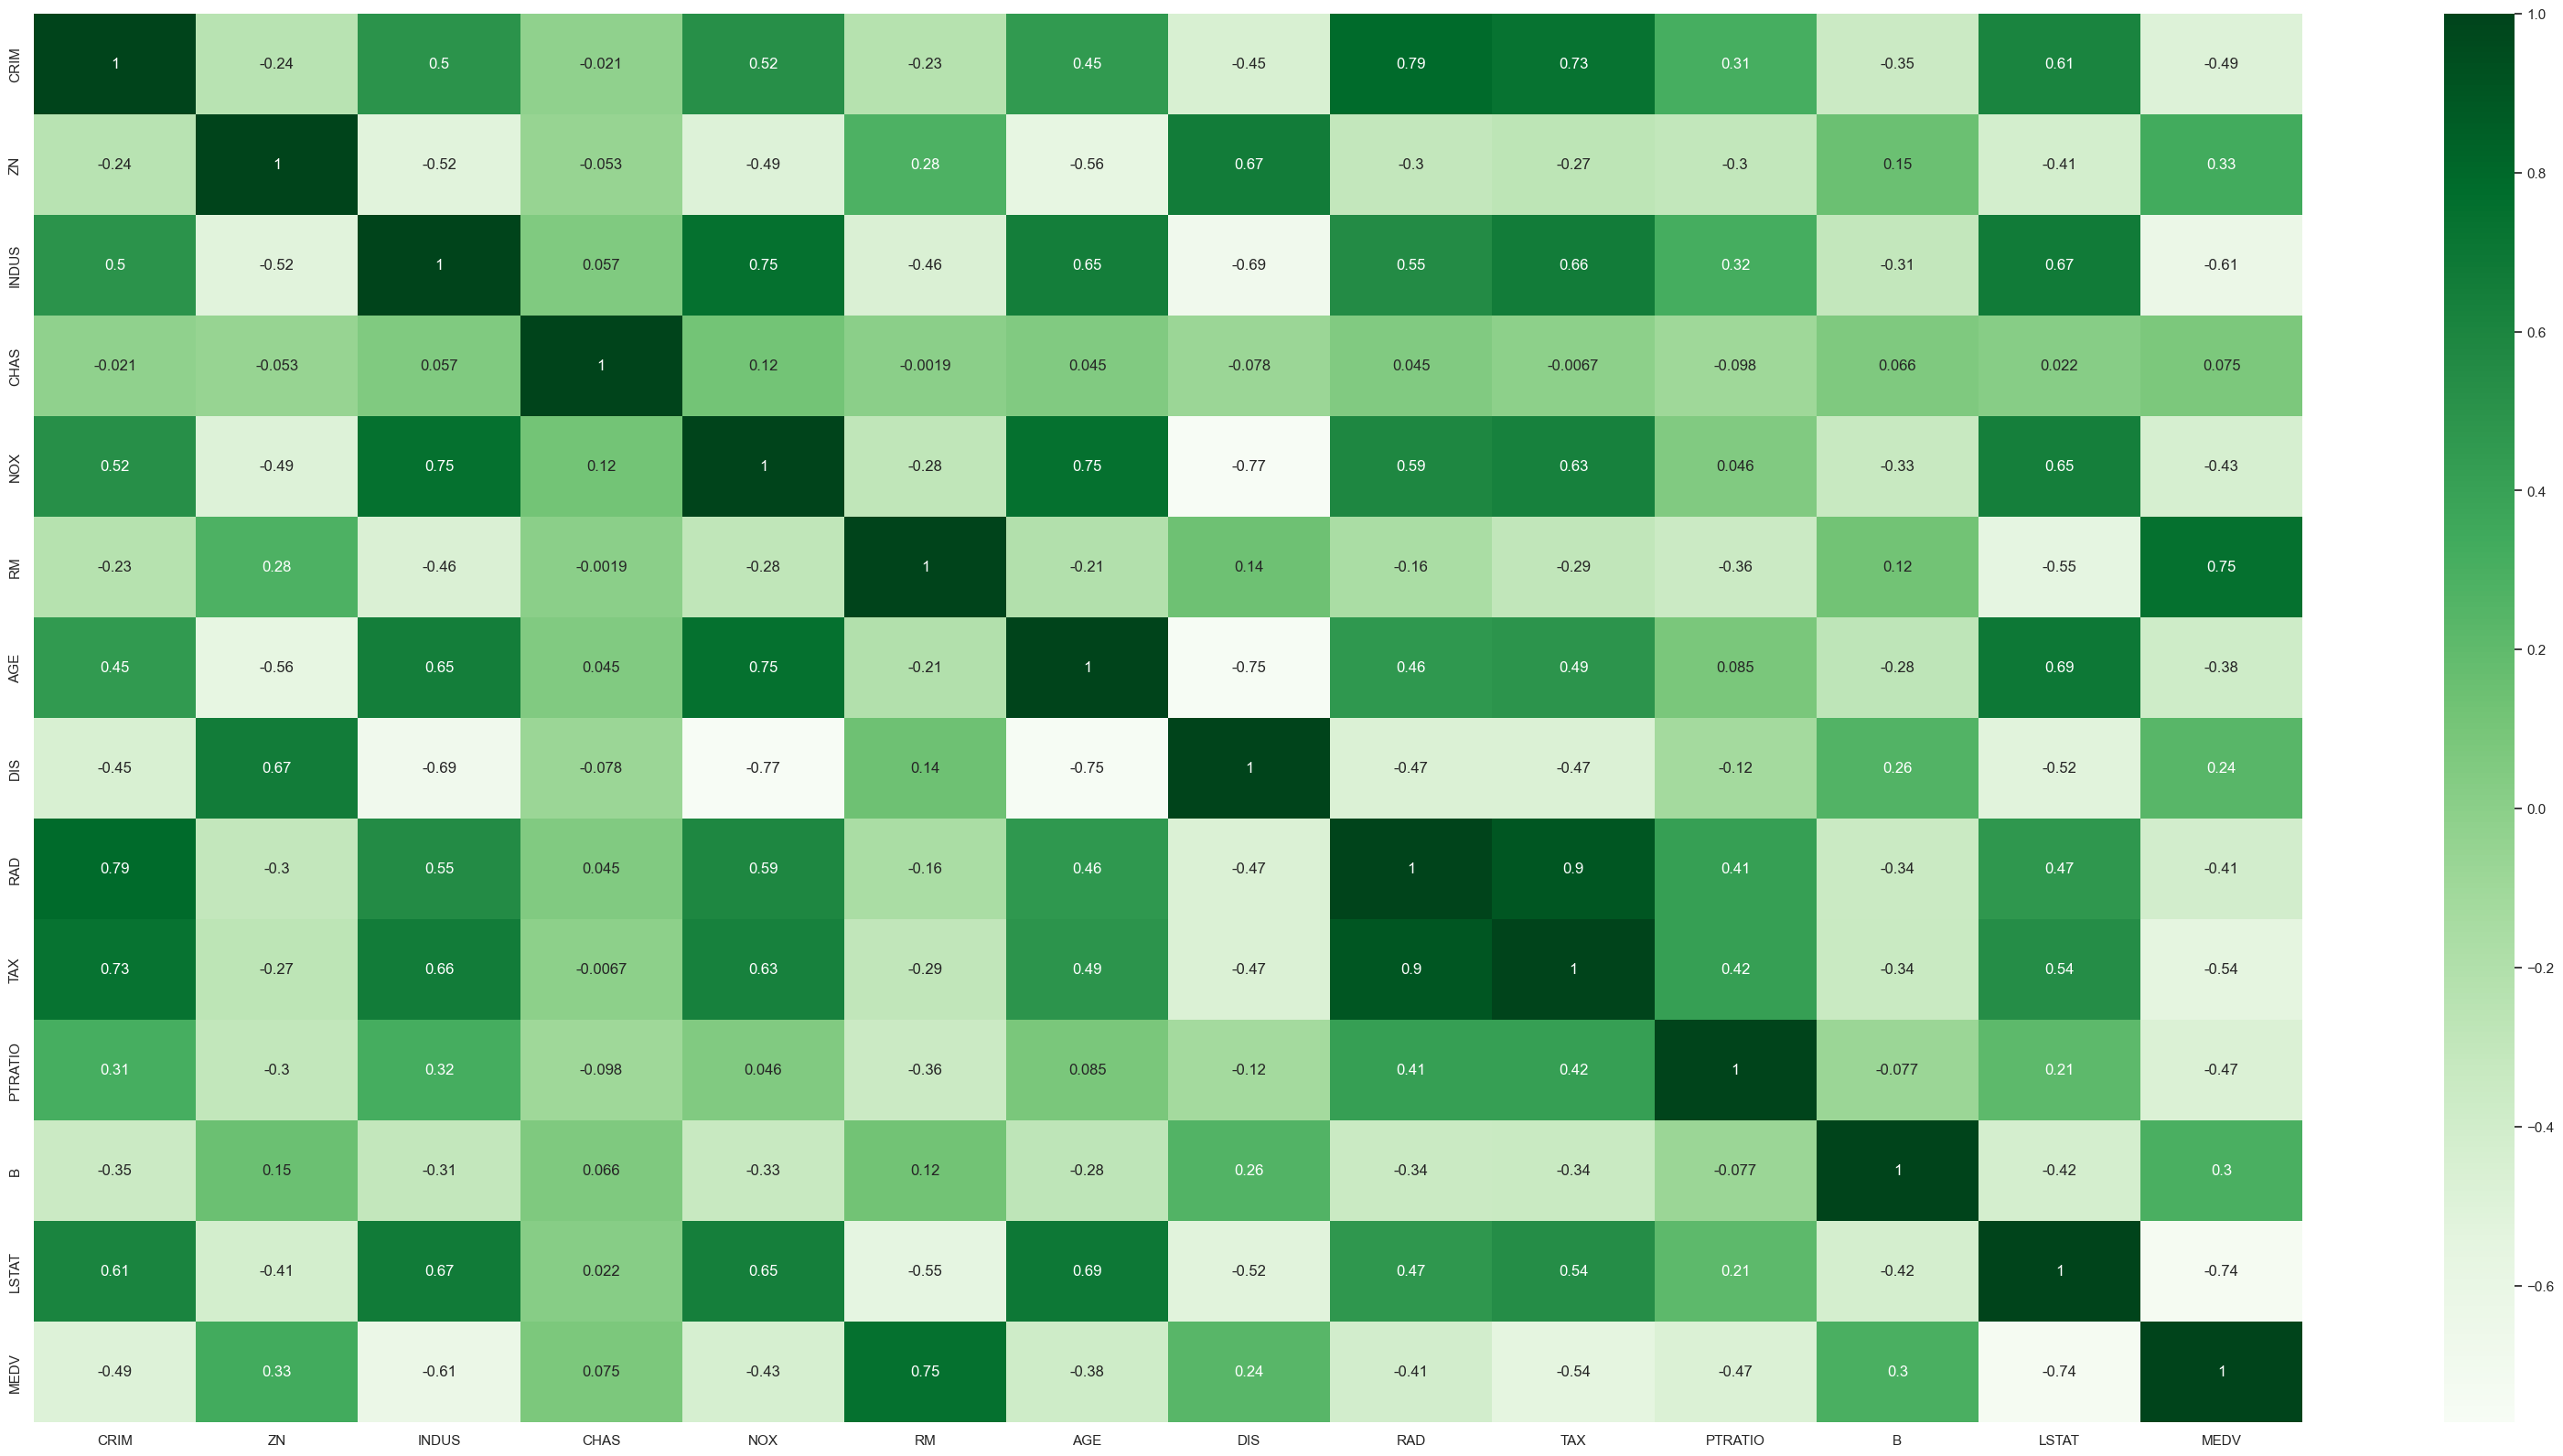

In [466]:
# Hacemos heatmap para ver las correlaciones de Test

sns.heatmap(test.corr(),annot=True,cmap='Greens')

sns.set(rc={"figure.figsize": (12, 6)})

### Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

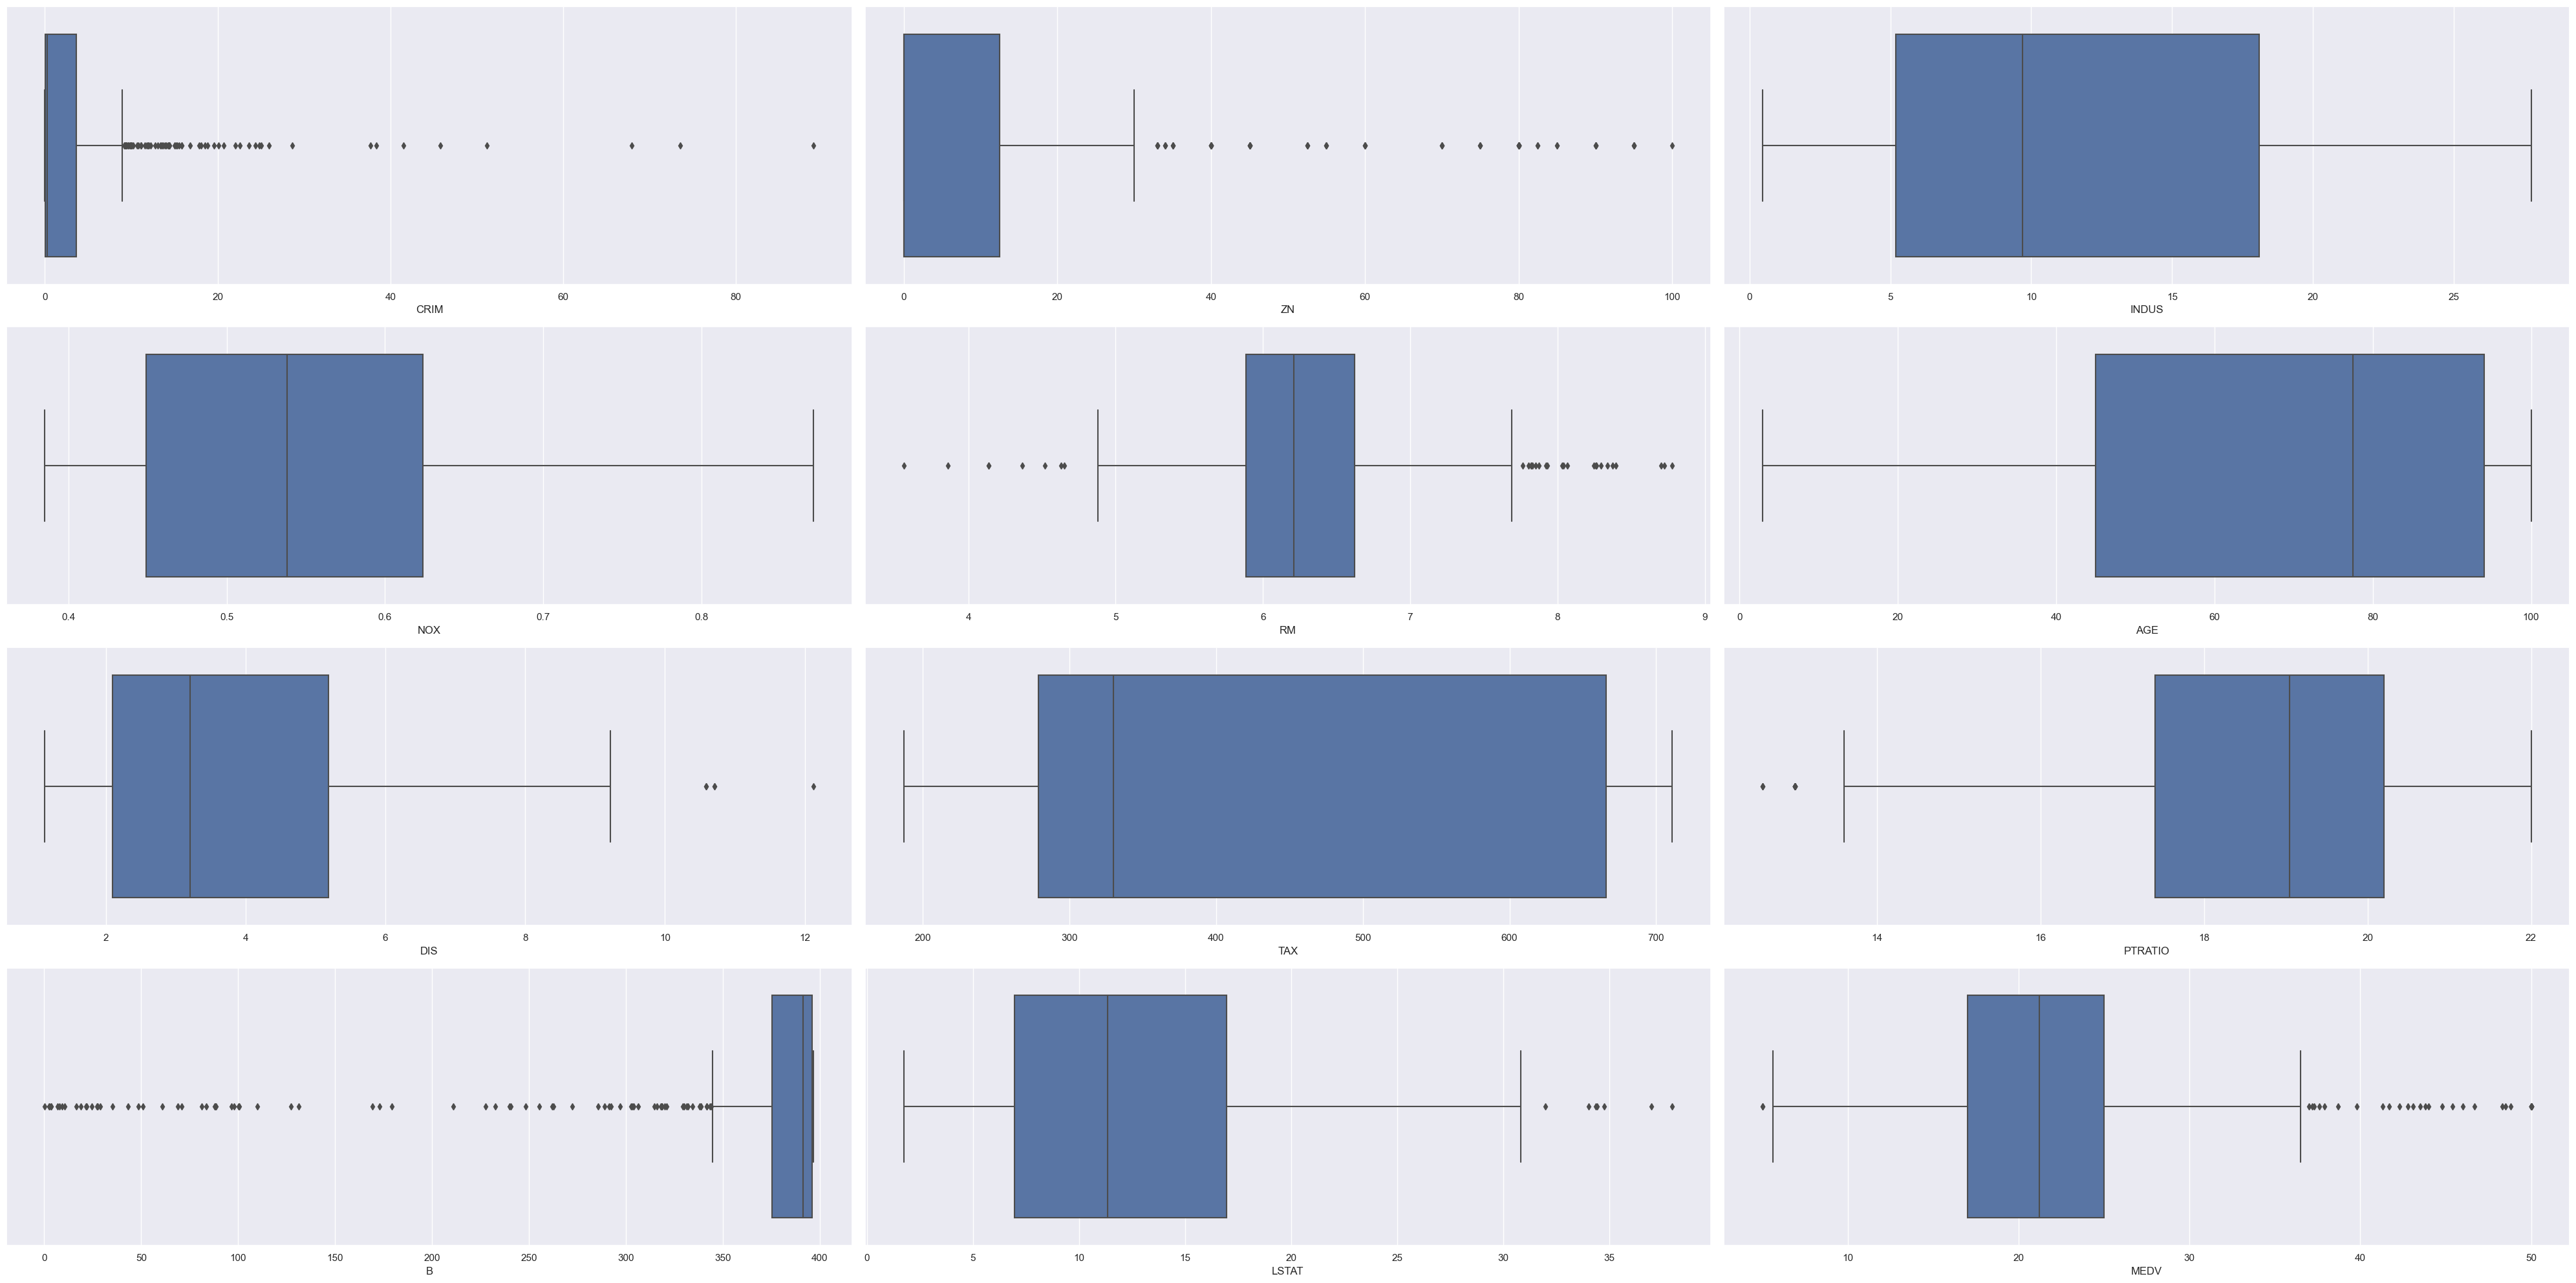

In [453]:
# Primero haremos un boxplot de las variables para tener una idea de los outliers 
# que puedan haber.
# Con ello podremos confirmar si es necesario estandarizar datos.
# Ya no incluimos las variables CHAS y RAD que pasan a ser categóricas.


plt.subplot(4,3,1)
sns.boxplot(x = 'CRIM',  data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'ZN',  data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'INDUS',  data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'NOX',  data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'RM',  data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'AGE',  data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'DIS',  data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'TAX',  data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'PTRATIO',  data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'B',  data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'LSTAT',  data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'MEDV',  data = df)


plt.tight_layout()



Vemos que las variables tienen escalas numéricas diferentes. Deberemos estandarizar las variables para que todas tengan la misma escala, lo que facilitará la comparación entre ellas. 
Se observan también muchos outliers en CRIM, ZN, B y MEDV, bastante alejados de la media y que podrían inferir negativamente, provocando algunos errores en nuestros análisis.

### PRIMER CASO:  Estandarización de los datos numéricos

In [427]:
# Hacemos estandarización de los datos numéricos. Utilizamos Standard Scaler

# Antes sacamos RAD Y CHAS del dataframe


df_numeric = df.drop(columns=['RAD', 'CHAS'])


from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(df_numeric.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'CRIM', 'ZN',
    'INDUS', #'CHAS',
    'NOX', 'RM', 'AGE', 'DIS', 
    #'RAD', 
    'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'])


df_scaled

# Así hemos conseguido la estandarización de los datos numéricos del dataframe.


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [428]:
df_scaled.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


La estandarización tiene como objetivo centrar y escalar las características de manera que tengan una media de 0 y una desviación estándar de 1, tal y como podemos comprobar en la tabla estadística anterior. 

Hay que decir que la forma de la distribución de cada característica se mantiene, lo que es importante para preservar la información relativa entre las observaciones.

### SEGUNDO CASO: Generación de columnas dummy. 


Las variables más susceptibles de convertir en columnas dummies son las categóricas,
es decir CHAS y RAD. CHAS ya consta como binaria (y aunque podríamos también transformarla) en este caso convertiremos la variable RAD que tiene 9 categorías.

In [429]:
df['CHAS'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [430]:
df['RAD'].unique()

[1, 2, 3, 5, 4, 8, 6, 7, 24]
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 24]

In [431]:
# Utilizamos la función One Hot Encoder


from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(handle_unknown='ignore')

# hacemos one-hot encoding en la columna 'RAD' 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['RAD']]).toarray())

# hacemos join de las columnas one-hot encoded con el DataFrame original
df_dummy = df.join(encoder_df)


print(df_dummy)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  ...  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0  ...   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0  ...   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0  ...   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0  ...   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0  ...   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...  ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0  ...   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0  ...   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0  ...   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0  ...   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0  ...   

     MEDV    0    1    2    3    4    5    6    7    8  
0    2

In [432]:
# eliminamos la columna 'RAD' original

# hacemos un drop para la columna 'RAD'
df_dummy.drop('RAD', axis=1, inplace=True)



In [433]:
df_dummy.columns

Index([   'CRIM',      'ZN',   'INDUS',    'CHAS',     'NOX',      'RM',
           'AGE',     'DIS',     'TAX', 'PTRATIO',       'B',   'LSTAT',
          'MEDV',         0,         1,         2,         3,         4,
               5,         6,         7,         8],
      dtype='object')

In [434]:
df_dummy_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
               'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT',
              'MEDV', 'RAD_0', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4',
               'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8']

In [435]:
df_dummy.columns = df_dummy_cols

In [436]:
df_dummy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_0,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

In [437]:
# resumen estadístico de la estandarización de datos numéricos

df_scaled.describe() 

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


Como hemos visto con anterioridad, la estandarización tiene como objetivo centrar y escalar las características de manera que tengan una media de 0 y una desviación estándar de 1

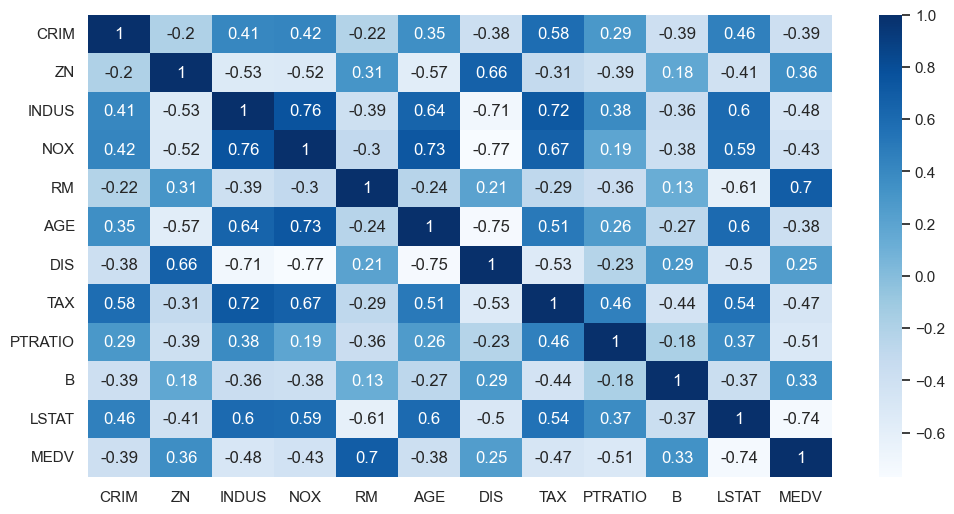

In [438]:
# Obtenemos el gráfico estadístico del dataframe estandarizado

# Hacemos un heatmap (matriz de correlación)

sns.heatmap(df_scaled.corr(),annot=True,cmap='Blues')
sns.set(rc={"figure.figsize": (12, 6)})

La tabla de correlaciones (ya estandarizada) nos permite realizar diversos estudios:

MEDV (Precio Medio) tiene una correlación medio-alta con RM (núm. de habitaciones por vivienda) de 0.7, indicando que a mayor número de habitaciones, mayor será el precio. La correlación de MEDV con LSTAT (% rentas bajas) es de -0.74, siedo la correlación negativa, en principio si el precio aumenta, el porcentaje de rentas bajas bajará, o lo que es lo mismo, a un precio más elevado solo serán asequibles para rentas más altas.

NOX (Concentración de óxido nítrico) está relacionada con la proporción de zonas industriales (INDUS). Con un índice de correlación de 0.76, podemos deducir que a cuando una de las 2 variables sube, la otra también. Es lógico que haya más polución en zonas industriales. 

Si miramos el PTRATIO (ratio profesor x alumno), encontramos una correlación positiva moderada de 0.46 con TAX. El ratio de profesores es mayor en áreas de mayor poder adquisitivo.



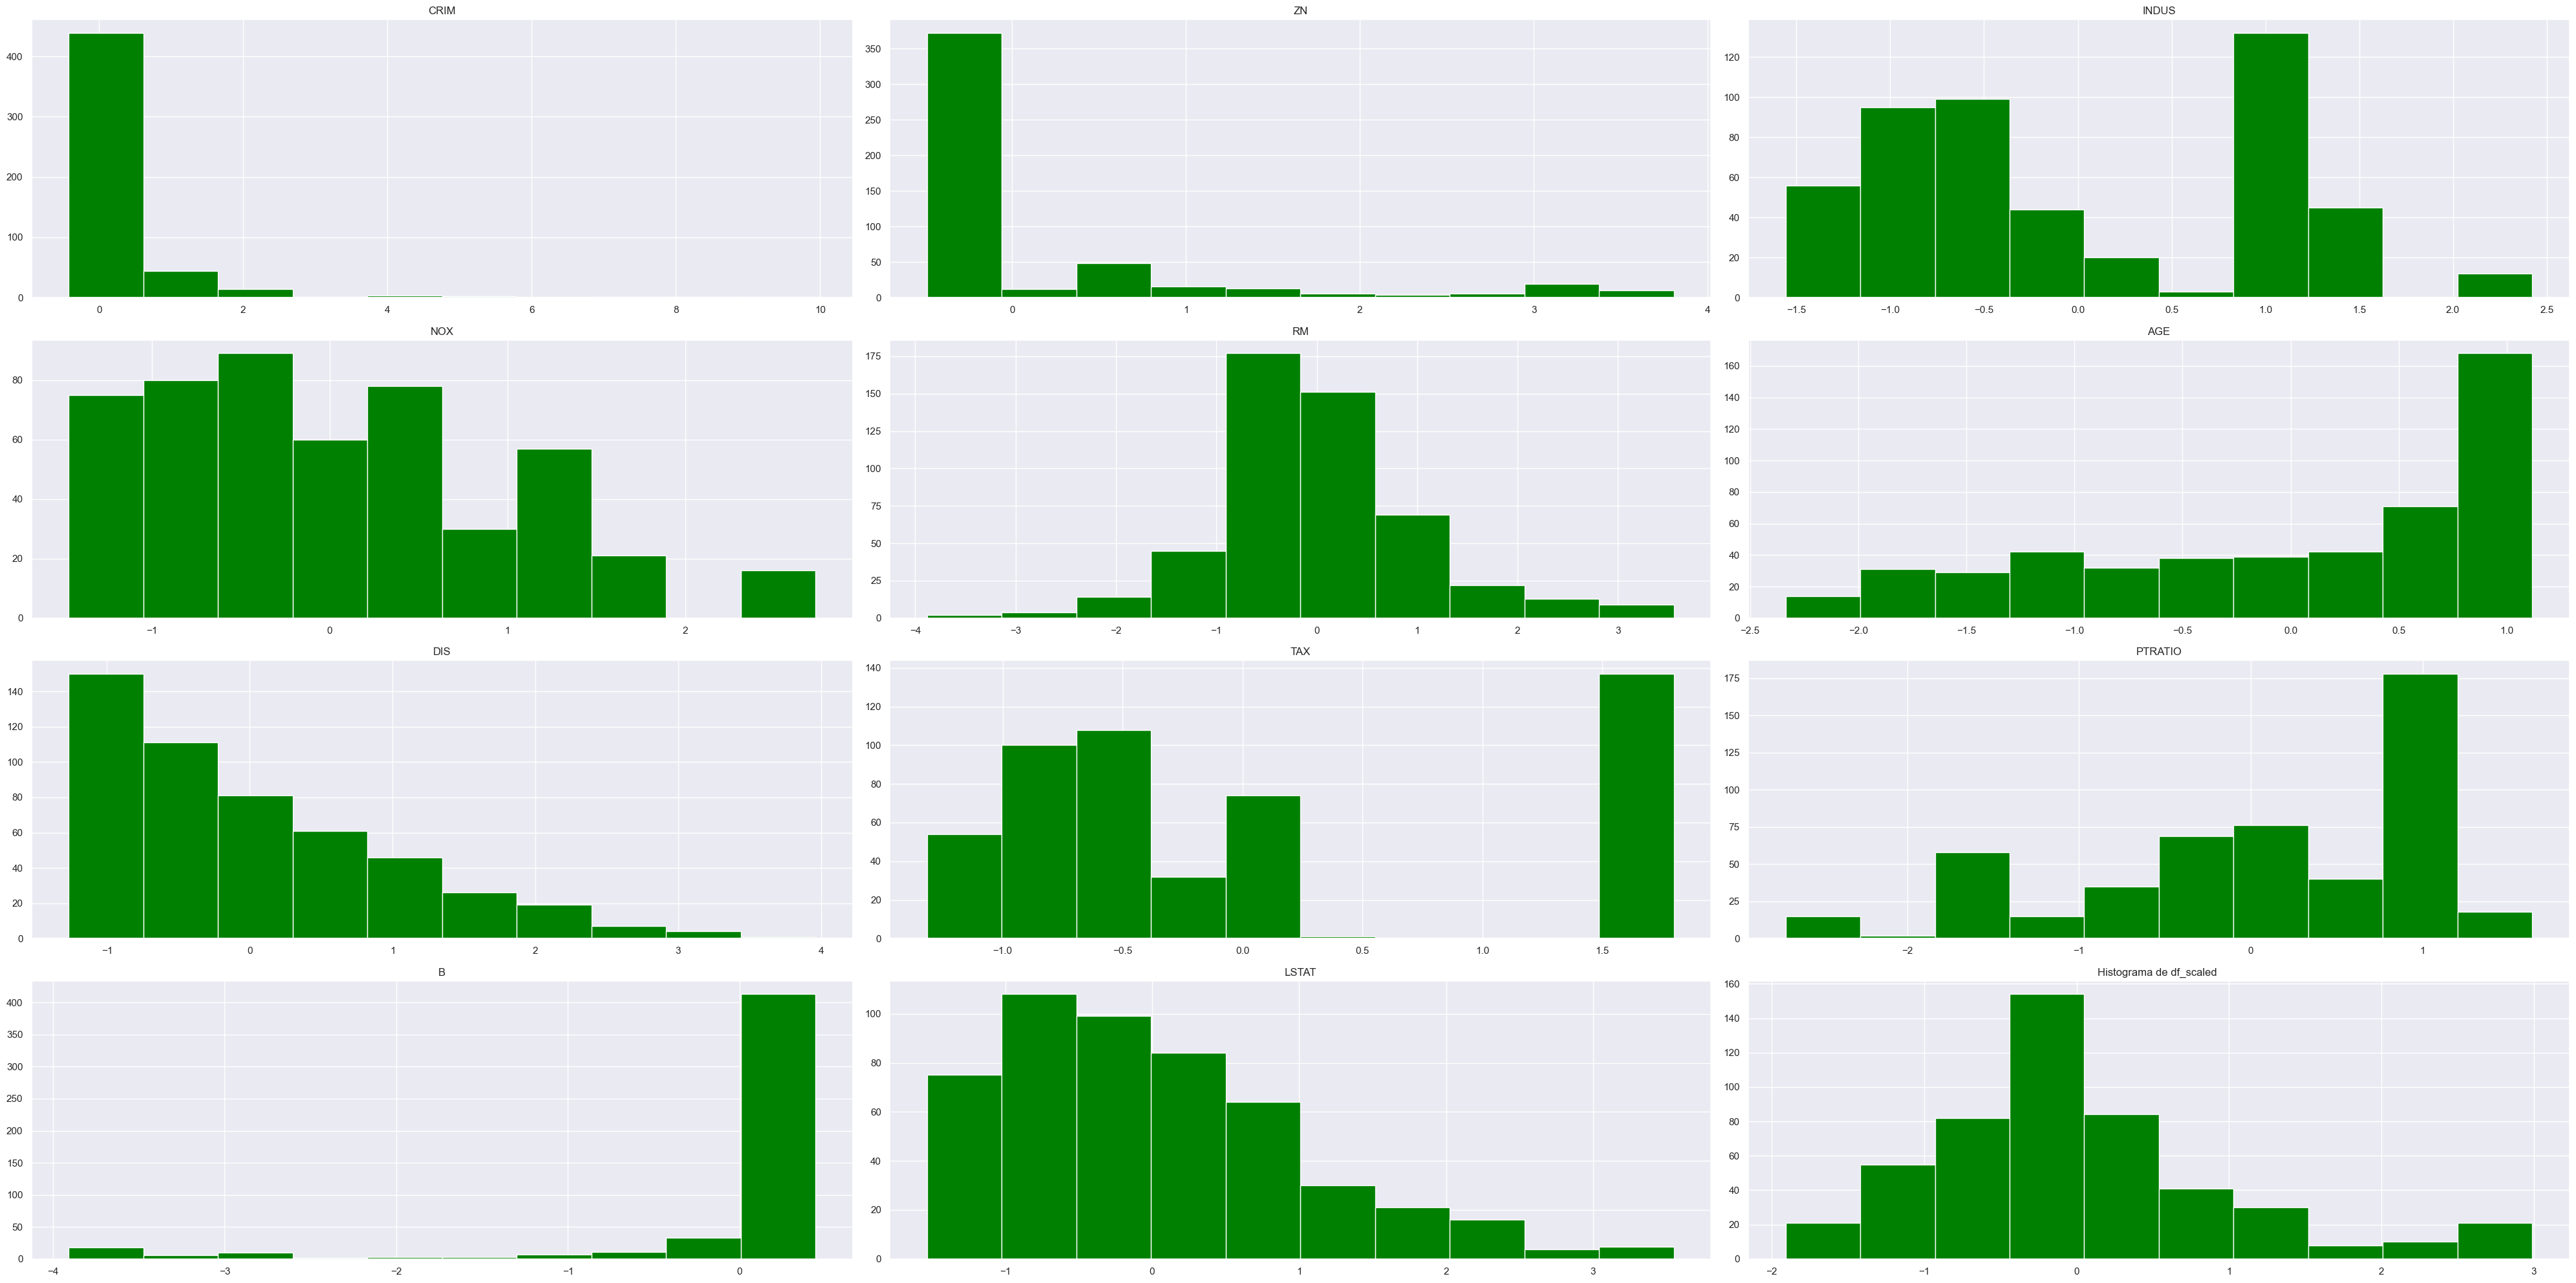

In [454]:
# Histograma df_scaled
df_scaled.hist(color='green')
plt.title('Histograma de df_scaled ')

plt.tight_layout()
plt.show()


Ahora haremos estudio estadístico de las nuevas columnas dummy generadas:



In [440]:
df_dummy.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,MEDV,RAD_0,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,...,22.532806,0.039526,0.047431,0.075099,0.217391,0.227273,0.051383,0.033597,0.047431,0.260870
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,...,9.197104,0.195035,0.212769,0.263812,0.412879,0.419485,0.220997,0.180367,0.212769,0.439543
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,...,17.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,...,21.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,...,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


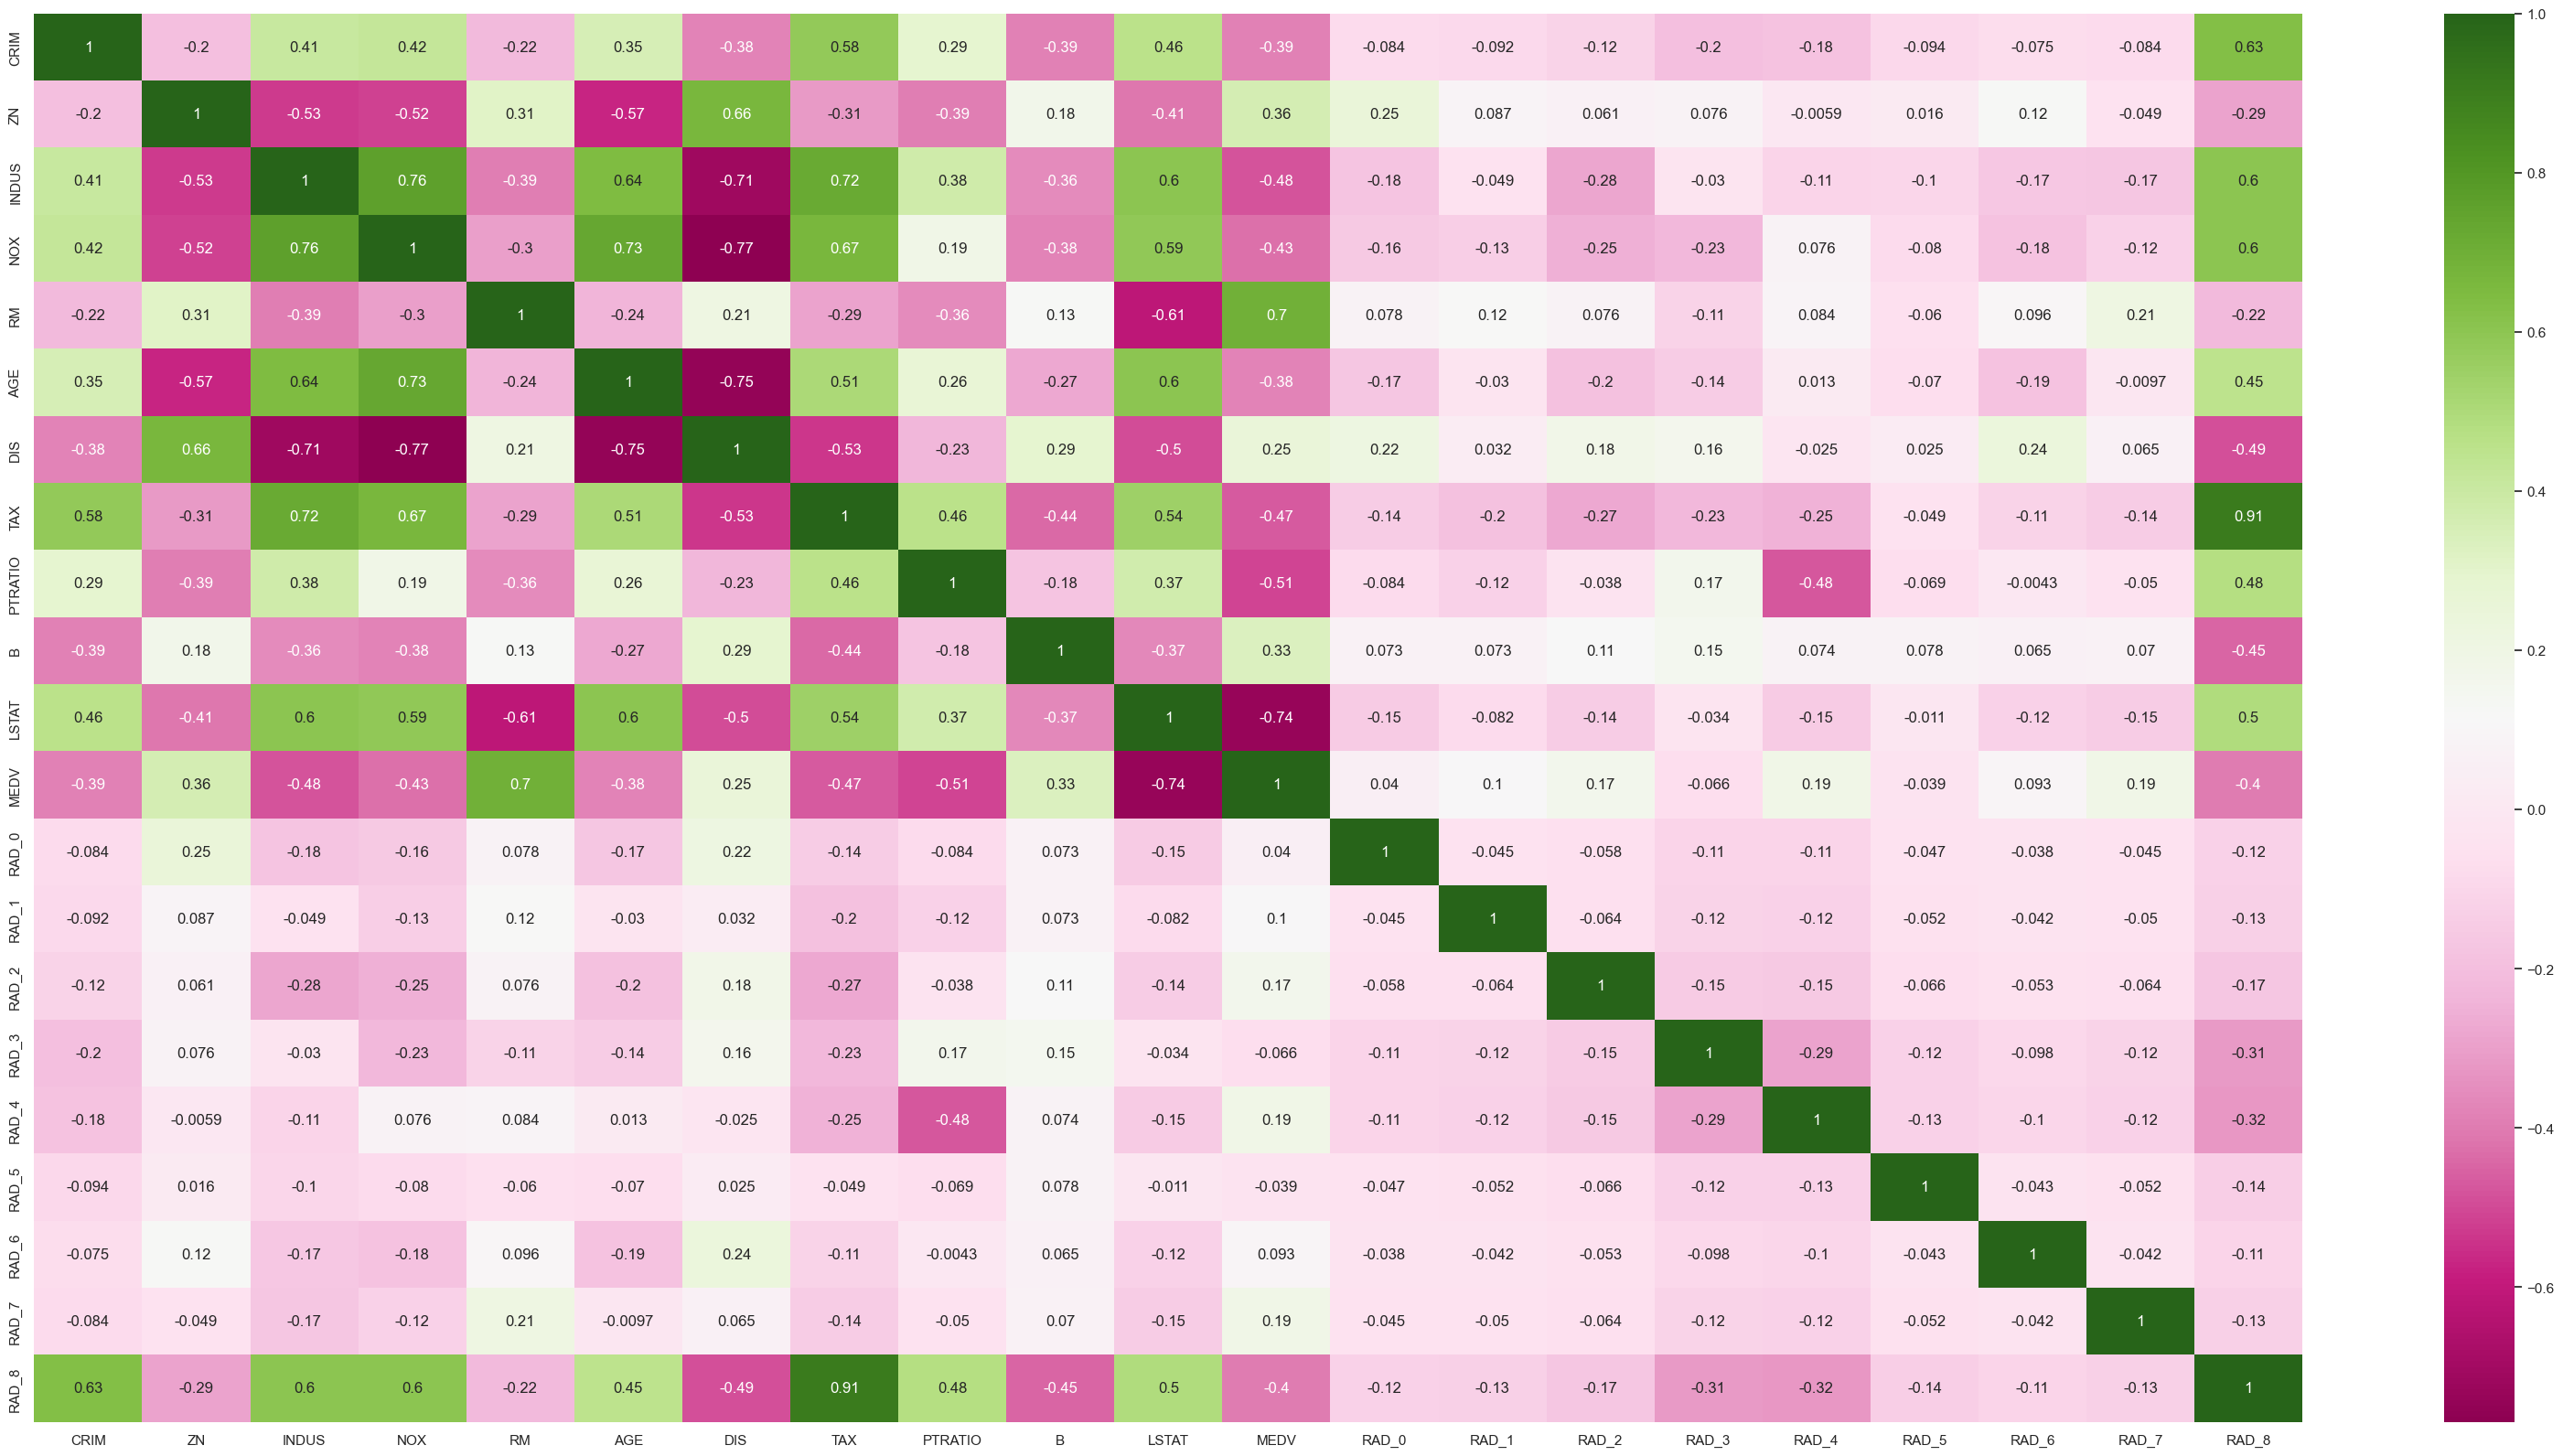

In [455]:
# Representación gráfica del dataframe con las columnas dummies para CHAS creadas.

sns.heatmap(df_dummy.corr(),annot=True,cmap='PiYG')
sns.set(rc={"figure.figsize": (40, 20)})

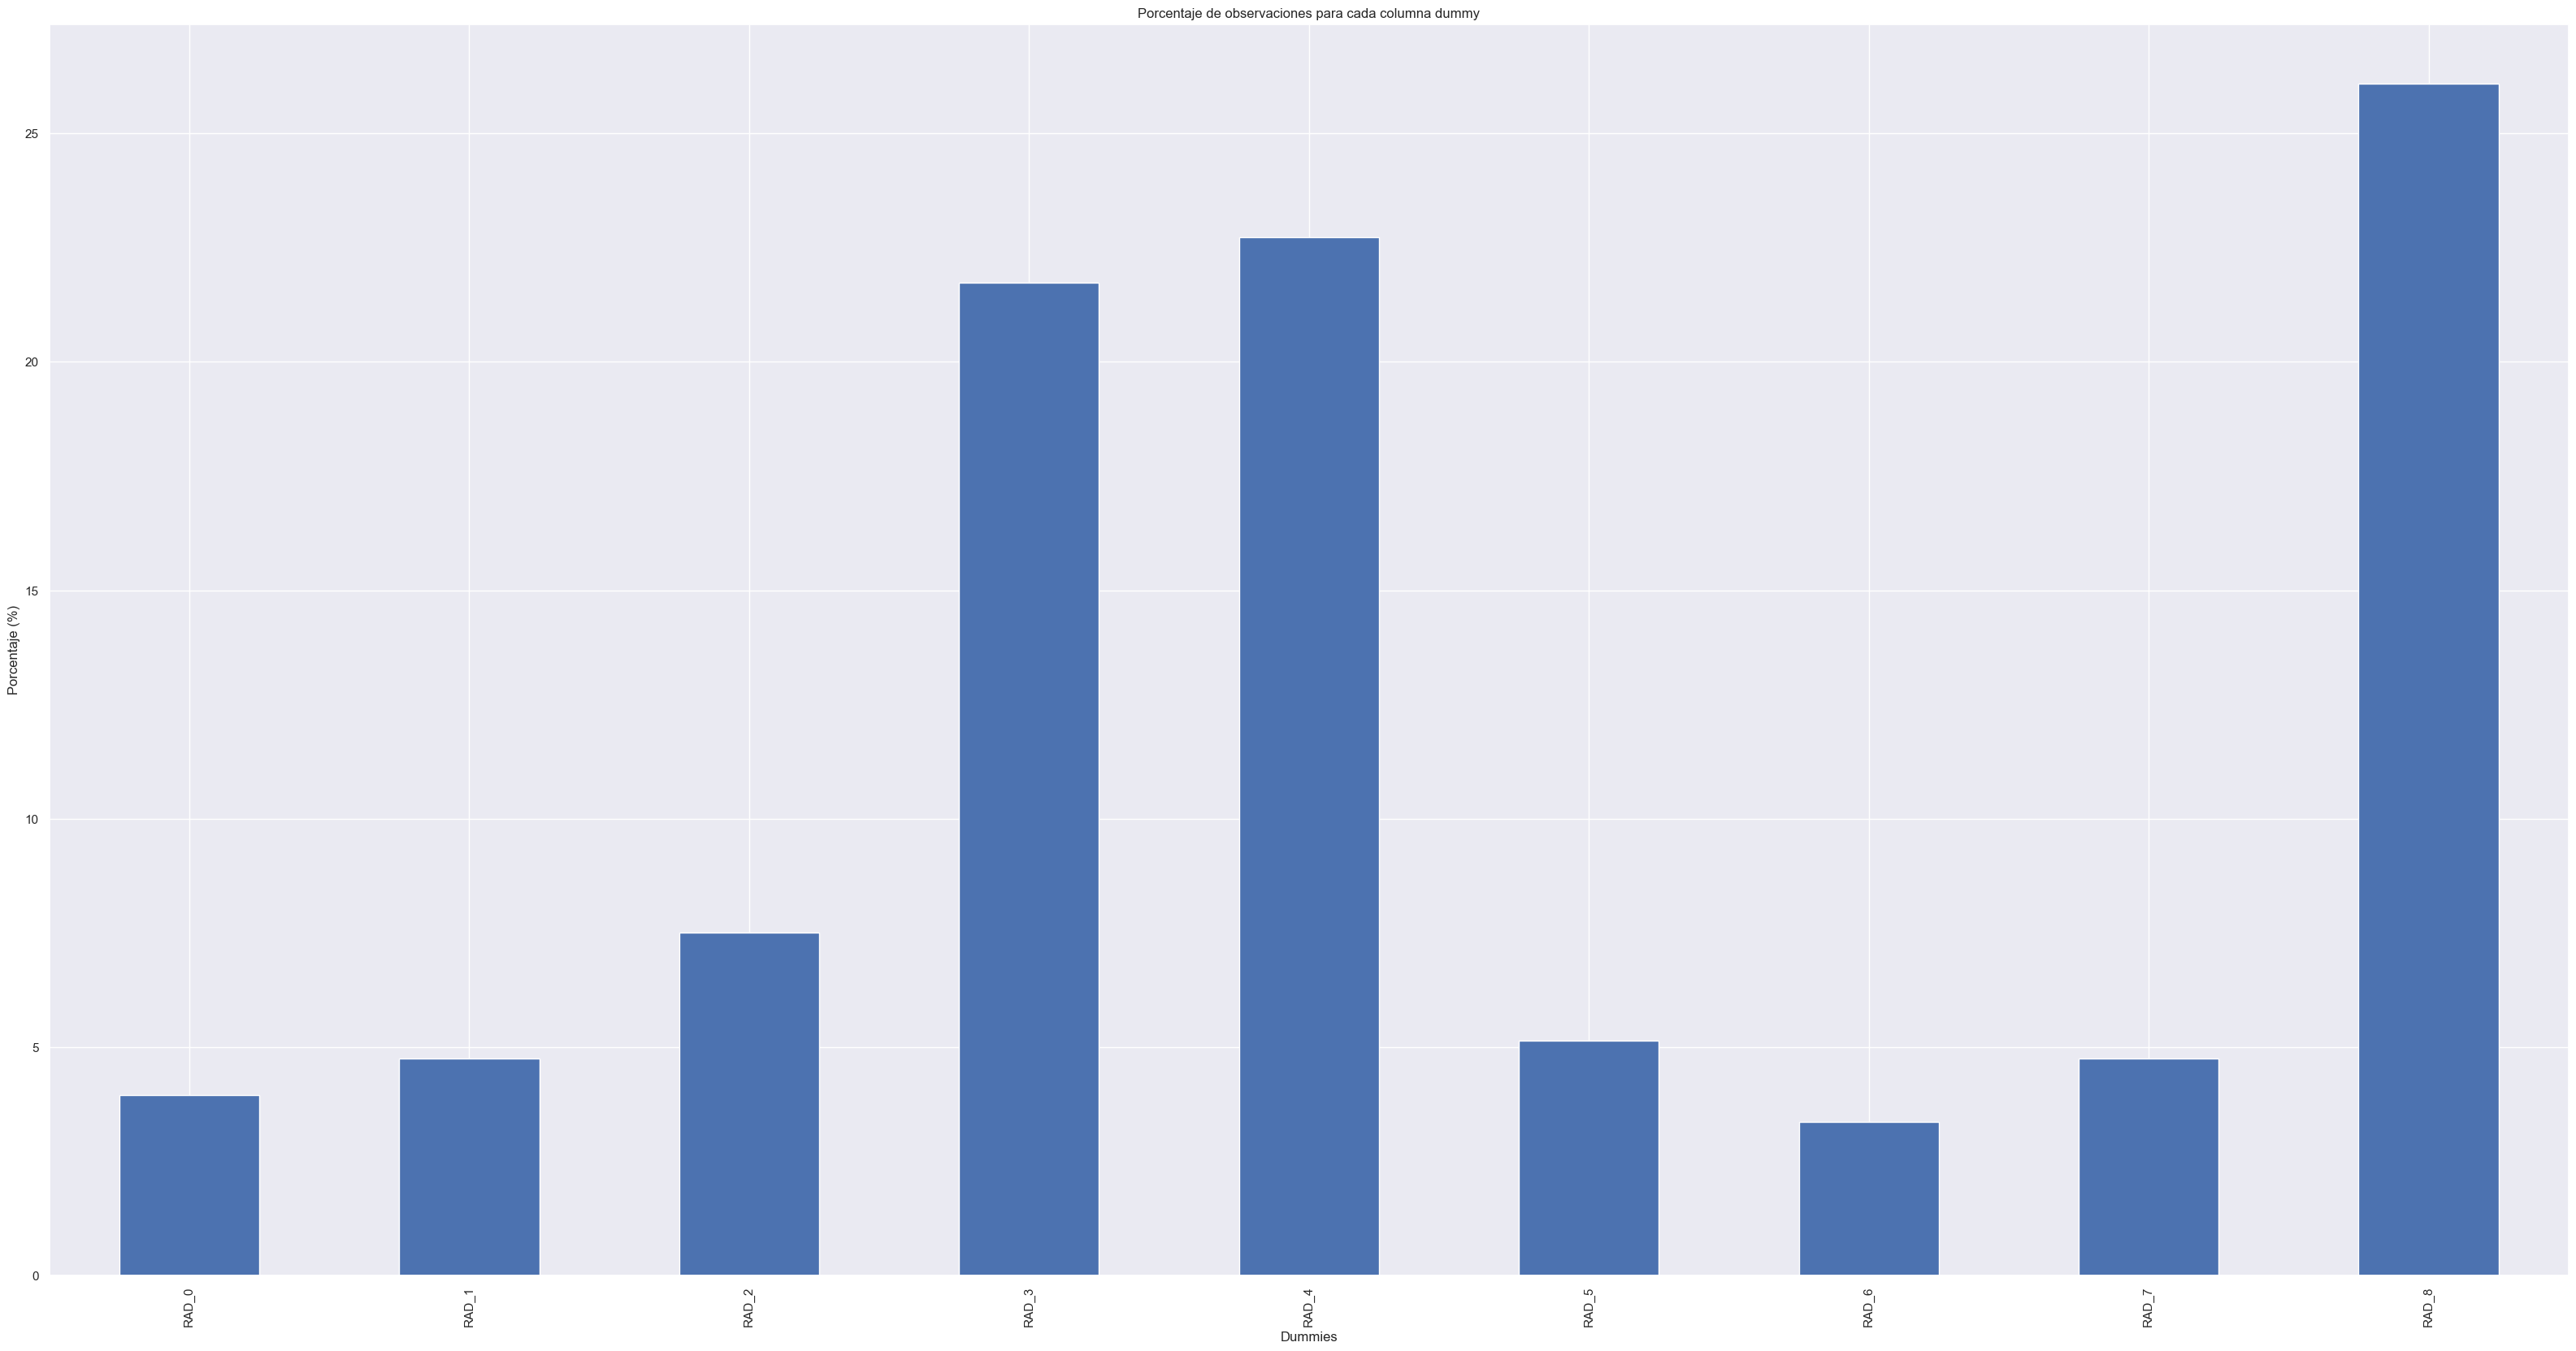

In [442]:
# Visualizaremos el porcentaje de observaciones para cada columna dummy

# seleccionamos todas las columnas dummy relacionadas con la variable 'RAD_'

dummies_columns = [col for col in df_dummy.columns if 'RAD_' in col]

df_porcentaje = df_dummy[dummies_columns].sum() / len(df_dummy) * 100


df_porcentaje.plot(kind='bar')
plt.title('Porcentaje de observaciones para cada columna dummy')
plt.xlabel('Dummies')
plt.ylabel('Porcentaje (%)')


plt.show()


In [459]:
df_dummy['RAD_8'].value_counts()

0.0    374
1.0    132
Name: RAD_8, dtype: int64

In [460]:
df_dummy['RAD_4'].value_counts()

0.0    391
1.0    115
Name: RAD_4, dtype: int64

In [461]:
df_dummy['RAD_3'].value_counts()

0.0    396
1.0    110
Name: RAD_3, dtype: int64

Las columnas dummies que más influirán en el estudio, son RAD_8, RAD_4 y RAD_3. Tienen unos índices de correlación con el resto de variables, principalmente RAD_8.
Pero la más influyente es RAD_8 (con el mayor índice de accesibilidad a autopistas radiales). Por ejemplo, vemos lo siguiente:

Una correlación de 0.63 con CRIM. A más acceso a autopistas radiales, habrá una mayor tasa de crimen.

Una correlación de 0.6 con INDUS. A más acceso a autopistas radiales, habrá una mayor concentración de zonas industriales.

Correlación de 0.6 con NOX. También lógico, ya que a mayor proximidad a autopistas  habrá más contaminación. 

Vemos que hay un alto grado de correlación con TAX de 0.91. Es un poco contradictorio, pero asumiremos que las zonas residenciales se encuentran fuera del centro de la ciudad, y por tanto próximas a las autopistas radiales. Es algo bastante común y más todavía en Estados Unidos.